# Wine Quality Analysis

##### Project Introduction:

Wine is one of the most popular alcohols for daily basics, but what would be the essential reasons to determine the quality of them? Here's data analysis step by step exploring the insides.

In [73]:
# importing Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from scipy.stats import norm
from scipy import stats

import warnings
warnings.filterwarnings(action="ignore")

# Loading the dataset

The dataset was downloaded from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/wine+quality

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. The reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


In [74]:
# loading the dataset and check sample
df = pd.read_csv('winequalityN.csv')
df.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
5229,red,10.2,0.36,0.64,2.9,0.122,10.0,41.0,0.99800,3.23,0.66,12.5,6
1761,white,8.0,0.30,0.28,5.7,0.044,31.0,124.0,0.99480,3.16,0.51,10.2,6
831,white,7.4,0.17,0.40,5.5,0.037,34.0,161.0,0.99350,3.05,0.62,11.5,4
1291,white,7.5,0.23,0.32,9.2,0.038,54.0,191.0,0.99660,3.04,0.56,9.7,6
5973,red,9.1,0.25,0.34,2.0,0.071,45.0,67.0,0.99769,3.44,0.86,10.2,7


In [75]:
# Print the Shape of the dataset
df.shape

(6497, 13)

##### dataset columns explanation:
`description`: introduction from hosts about the general information of their listings
`property_type`: the property types, such as Apartment, Condominium, House, and so on
`room_type`: customer rental space as the Entire home/apt, Private Room, or Shared rooms
`bed_type`: sleeping area as the Real Bed, Futon, Pull-out Sofa, Airbed or others
`cancellation_policy`: including moderate, flexible, strict_14_with_grace_period

In [76]:
# overall information about the Toronto 2019 Airbnb listings
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Based on the sample of the dataset and overall pieces of information about it.
we can tell that the dataset has minimal null values,also looks like the data types for each column are correct.

<AxesSubplot:>

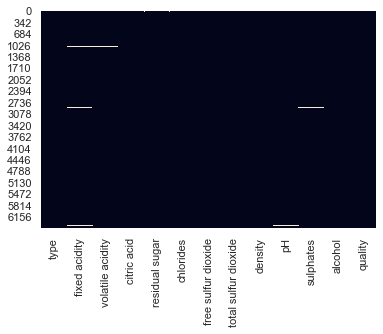

In [77]:
# visualizing null values located in the dataset
sns.heatmap(df.isnull(), cbar=False)

In [78]:
# checking null values by columns
pd.DataFrame({"Null_Percentage":(df.isna().mean()*100),"Null_Numbers":(df.isna().sum(axis=0))})

,Null_Percentage,Null_Numbers
type,0.000000,0
fixed acidity,0.153917,10
volatile acidity,0.123134,8
citric acid,0.046175,3
residual sugar,0.030783,2
chlorides,0.030783,2
free sulfur dioxide,0.000000,0
total sulfur dioxide,0.000000,0
density,0.000000,0
pH,0.138525,9


as we discovered above, the dataset generally has very minimal null values across each column and the maximum of null values came from the `description` column which contains 371 rows, less than 1.8% of the entire dataset rows.
in order to speed up the process, let's drop all of those rows with null values.

In [79]:
# drop all null values
df=df.dropna(how='any')

In [80]:
# any duplicated columns?
df.transpose().duplicated()

type                    False
fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

column `is_business_travel_ready` duplicated with others.
let's hold the decision if we should drop the column.

In [81]:
# any duplicated rows
df.duplicated().sum()

1168

# EDA

Exploratory Data Analysis - does this for Machine Learning enthusiast. It is a way of visualizing, summarizing and interpreting the information that is hidden in rows and column format. ... Once EDA is complete and insights are drawn, its feature can be used for supervised and unsupervised machine learning modelling

##### Quality Feature Analysis

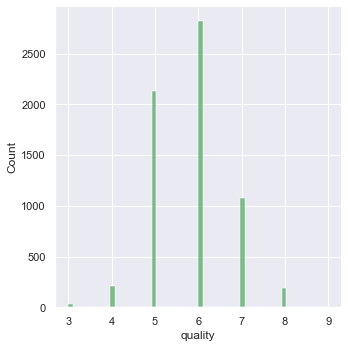

In [82]:
# histogram of the price
sns.displot(df['quality'],color='g')

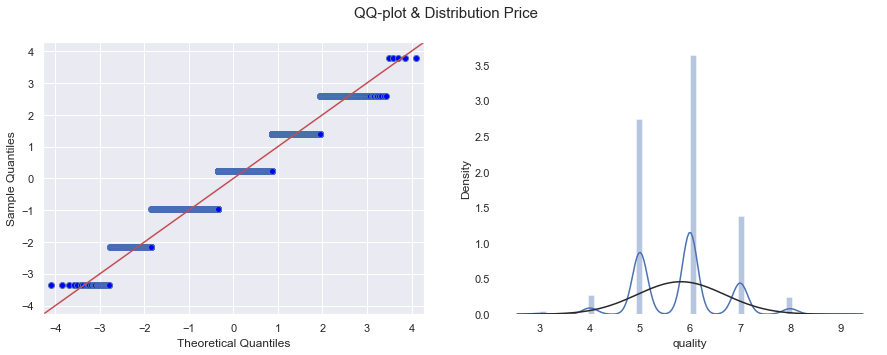

In [83]:
# check the price distribution

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("QQ-plot & Distribution Price ", fontsize= 15)

sm.qqplot(df["quality"], stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(df["quality"], kde = True, hist=True, fit = norm, ax = ax[1])
plt.box(False)
plt.show()

the QQ plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that's roughly straight.

the Distribution Price plot shows that majority of the 2019 Toronto Airbnb was under 500 CAD.

In [84]:
# print skew
from scipy.stats import skew
print("Skewness of the Price is", df['quality'].skew())

Skewness of the Price is 0.18987779266325913


In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.
For normally distributed data, the skewness should be about zero.
and this dataset has extremally high skewness which means it could be hard for models to predict.

* Get Correlation between different numerical variables

In [85]:
# check the correlation price vs others:
corr_quality = df.corr()[['quality']].sort_values(by='quality')

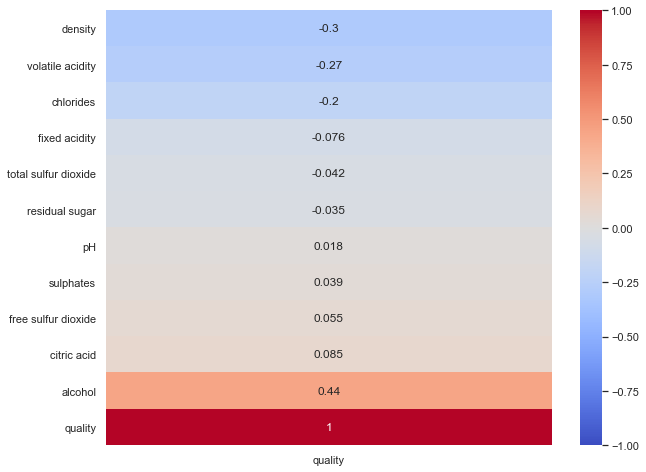

In [86]:
# corr. heatmap for the target vs numercial features
plt.figure(figsize=(10,8))
sns.heatmap(corr_quality, vmin=-1, vmax=1, cmap='coolwarm',annot=True)
plt.show()

Brifly check the correlation coefficient, we can tell that quality has a positive relationship with the alcohol and negative relationship with the density.

The price has the lower than moderate positive relationship (Correlation Coefficient < 0.6) with accommodates, bathrooms, bedrooms, and beds.

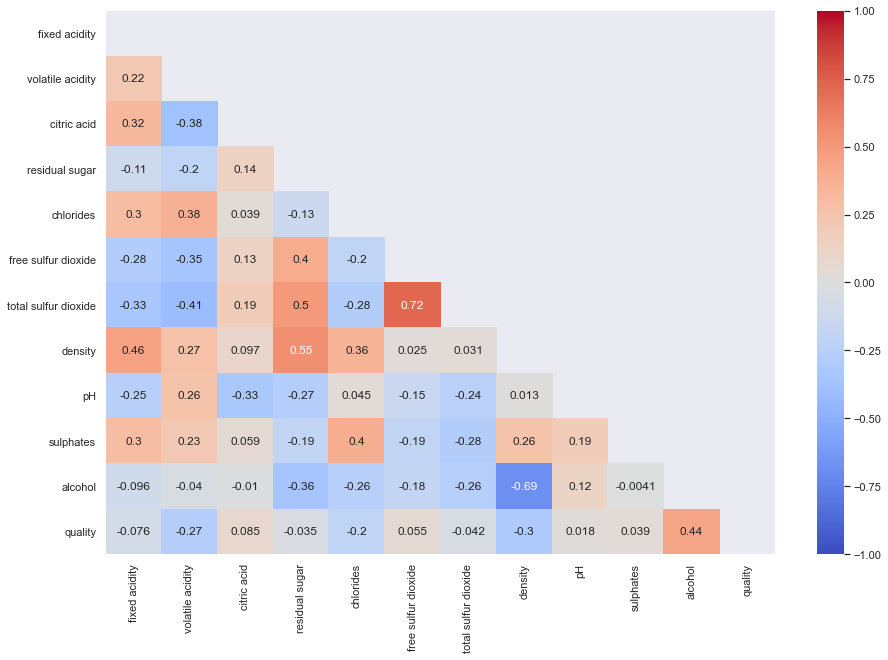

In [87]:
# Let's also look at correlations between the independent variables
plt.figure(figsize=(15,10))
mask = np.triu(df.corr())
sns.heatmap(df.corr(), vmin=-1, vmax=1,
            cmap='coolwarm',mask=mask,annot=True)
plt.show()

* "total sulfur dioxide" is highly positively correlatied with the "free sulfur dioxide"

* also the "alcohol" is highly negaively correlated with the "density"

[]

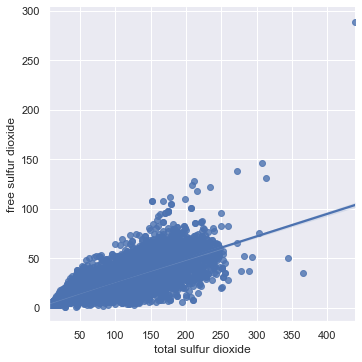

In [88]:
sns.lmplot(x="total sulfur dioxide",y="free sulfur dioxide",data=df)
plt.plot()

[]

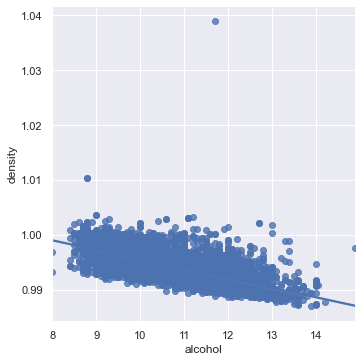

In [89]:
sns.lmplot(x="alcohol",y="density",data=df)
plt.plot()

##### Are these correlations statistically significant?

In [90]:
# H0: rho = 0
# H1: rho != 0

xxx = df.drop(['quality', 'type'],axis=1)
yyy = df['quality']

for i in xxx.columns:
    r, p_val = stats.pearsonr(xxx[i], yyy)
    print(f'Column: {i}, corr_coef: {round(r,3)}, p_val: {round(p_val,3)}') 

Column: fixed acidity, corr_coef: -0.076, p_val: 0.0
Column: volatile acidity, corr_coef: -0.267, p_val: 0.0
Column: citric acid, corr_coef: 0.085, p_val: 0.0
Column: residual sugar, corr_coef: -0.035, p_val: 0.005
Column: chlorides, corr_coef: -0.201, p_val: 0.0
Column: free sulfur dioxide, corr_coef: 0.055, p_val: 0.0
Column: total sulfur dioxide, corr_coef: -0.042, p_val: 0.001
Column: density, corr_coef: -0.304, p_val: 0.0
Column: pH, corr_coef: 0.018, p_val: 0.139
Column: sulphates, corr_coef: 0.039, p_val: 0.002
Column: alcohol, corr_coef: 0.445, p_val: 0.0


Across the dataset, it looks like most of the columns are significant. The one column that didn't appear significant was the `pH` column.

interestingly those 4 independence features have a fairly (Correlation Coefficient = 0.8) strong positive relationship with each other.

In [91]:
# pull out statistics for numerical columns
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


##### Looping tho. numerical columns

for "latitude" and "longitude" columns, we don't consider them as the traditional numerical columns. we'll analysis them separately.

also briefly check all numerical columns data distributions and scatterplot with the price.

------------------------------------------
Column:  fixed acidity
null values:  0


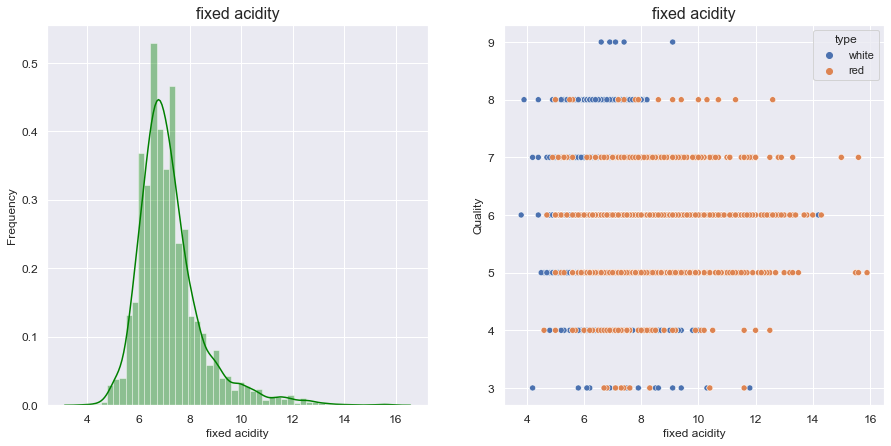

------------------------------------------
Column:  volatile acidity
null values:  0


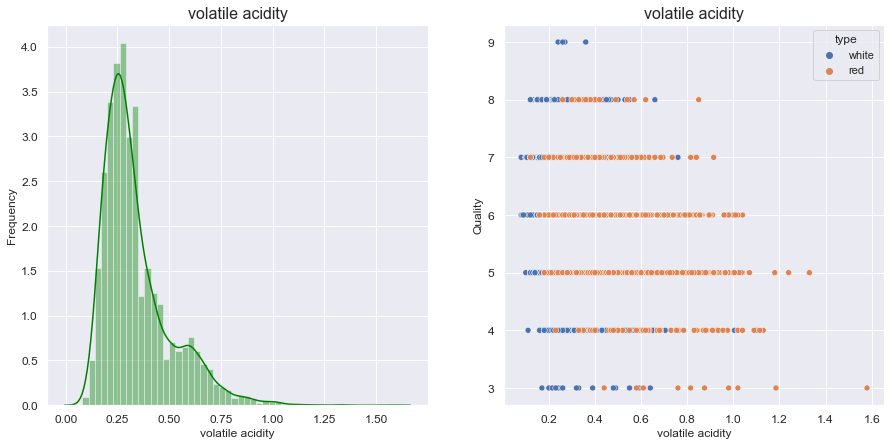

------------------------------------------
Column:  citric acid
null values:  0


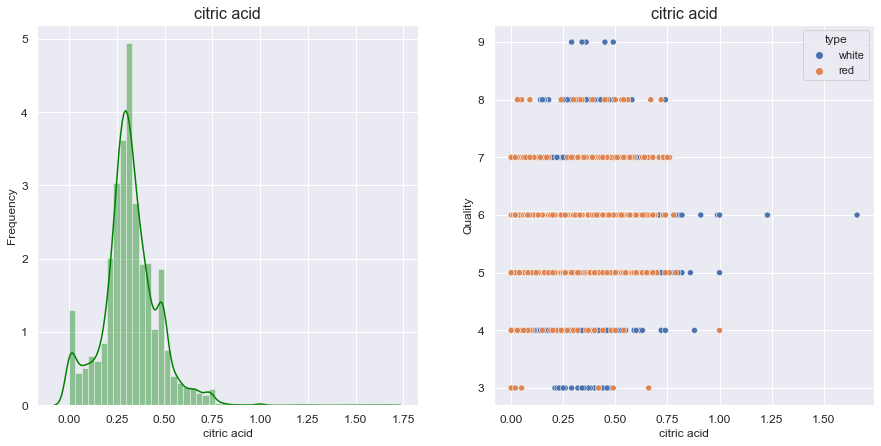

------------------------------------------
Column:  residual sugar
null values:  0


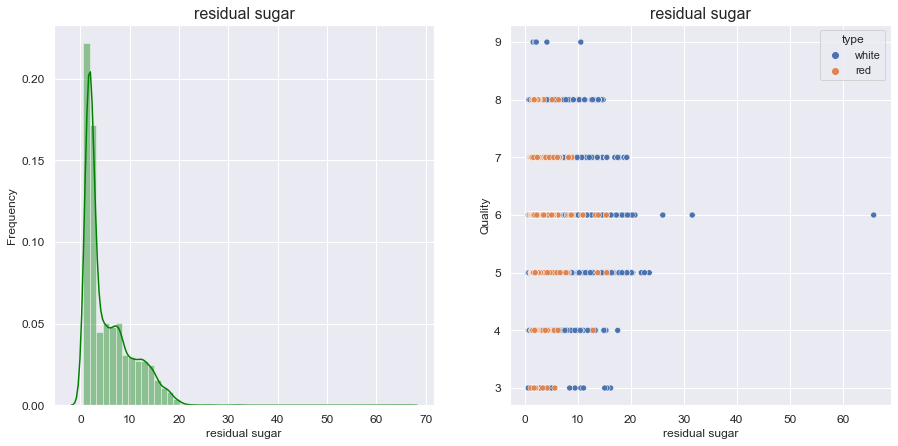

------------------------------------------
Column:  chlorides
null values:  0


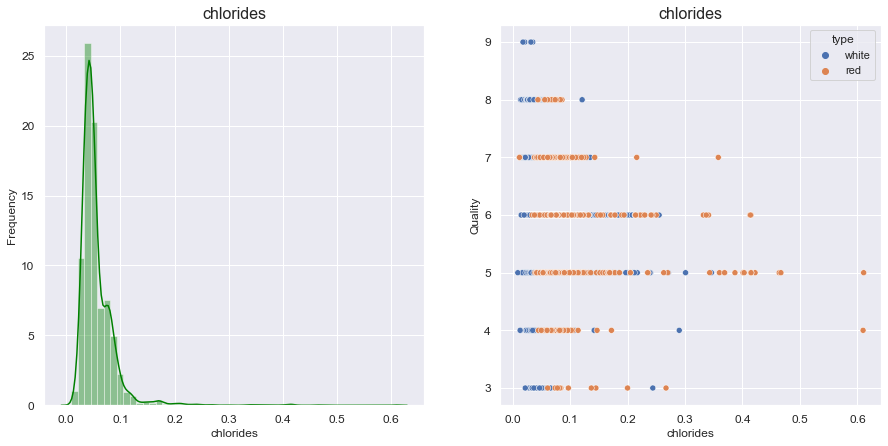

------------------------------------------
Column:  free sulfur dioxide
null values:  0


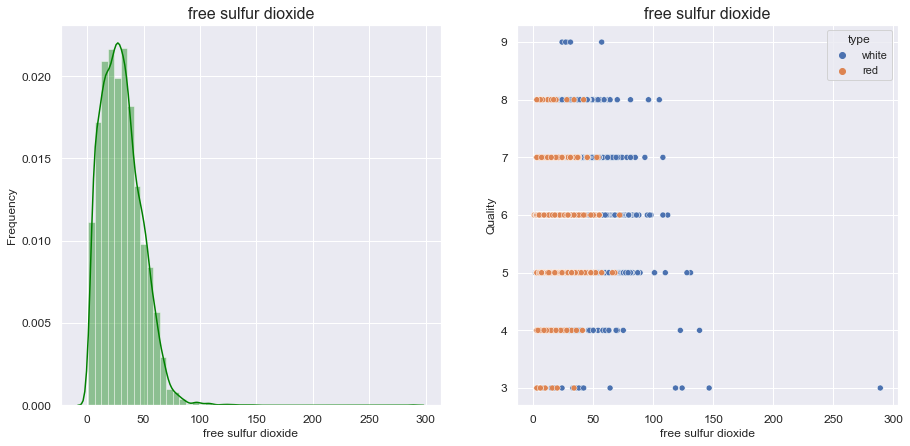

------------------------------------------
Column:  total sulfur dioxide
null values:  0


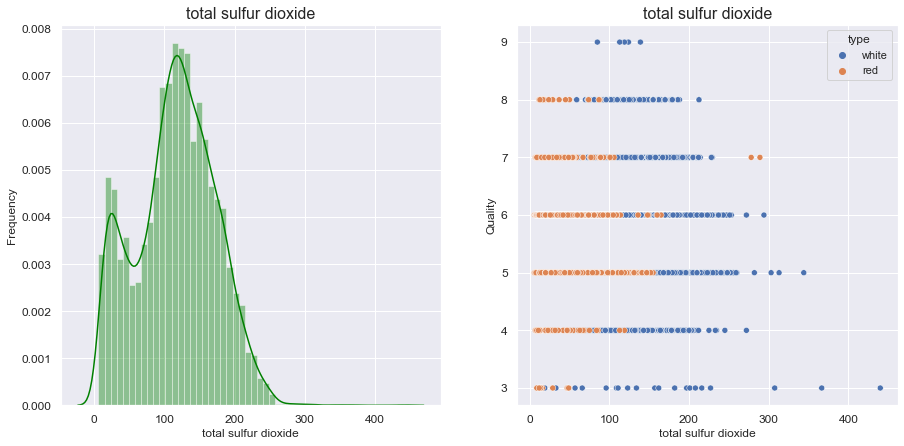

------------------------------------------
Column:  density
null values:  0


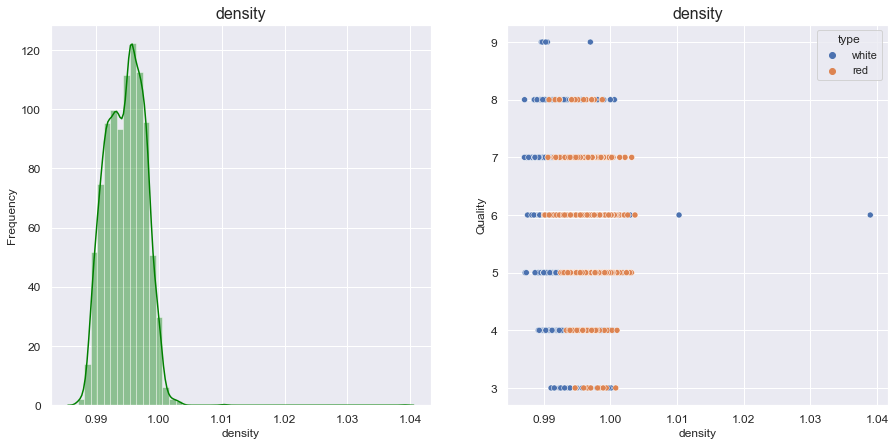

------------------------------------------
Column:  pH
null values:  0


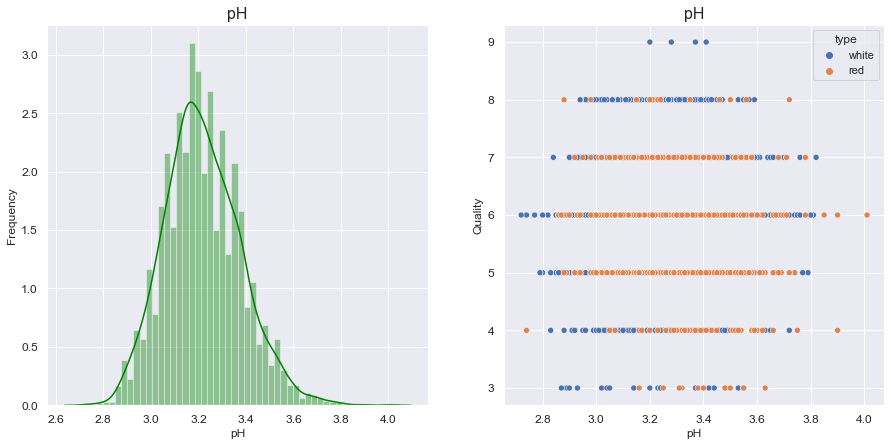

------------------------------------------
Column:  sulphates
null values:  0


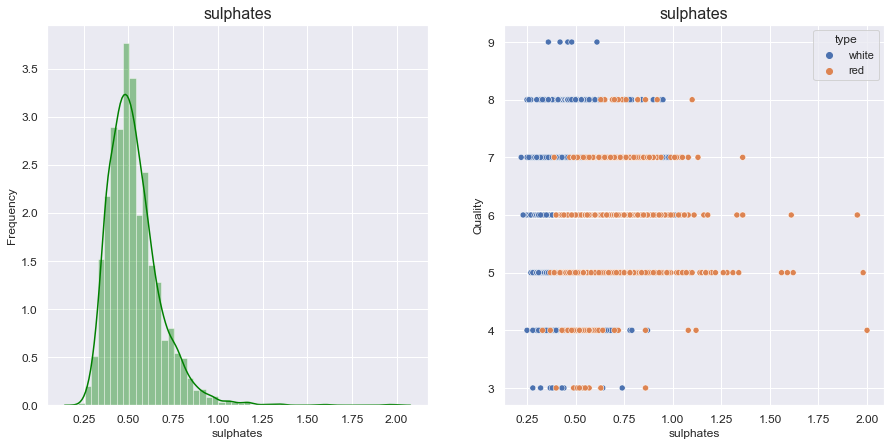

------------------------------------------
Column:  alcohol
null values:  0


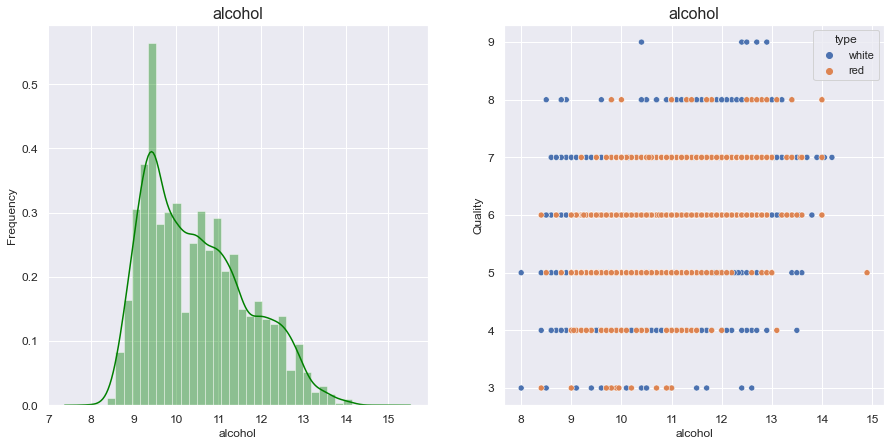

In [92]:
# looping tho. numerical columns

num_columns = df.drop(['quality', 'type'],axis=1)

for num in num_columns:
    print("------------------------------------------")
    print("Column: ",num)
    print("null values: ", df[num].isna().sum(axis=0))

    plt.subplots(1,2, figsize=(15,7))
    # subplot 1
    plt.subplot(1,2,1)
    sns.distplot(df[num],color='green')
    plt.title(num, fontsize=16)
    plt.xlabel(num, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    # subplot 2
    plt.subplot(1,2,2)
    sns.scatterplot(x=df[num], y=df['quality'],hue=df['type']) #color='purple'
    plt.title(num, fontsize=16)
    plt.xlabel(num, fontsize=12)
    plt.ylabel('Quality', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.show()

##### next, looping tho. categorical columns

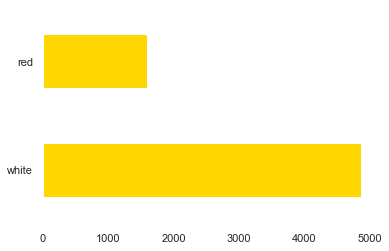

In [93]:
df['type'].value_counts().plot(kind='barh',color='gold')
plt.box(False) # remove the frame
plt.show()

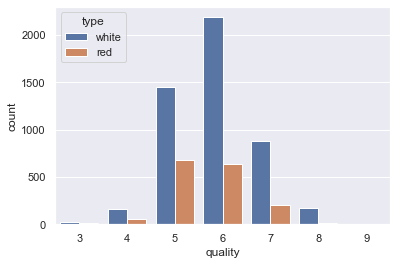

In [94]:
# sns.set(style="darkgrid")
sns.countplot(df["quality"],hue="type",data=df)
plt.show()

from the wine type distrubtion along with the quality, we can see that mostly of quality for white and red wine are set between level 5 and 6. from level  the amount of wine went down quickly.

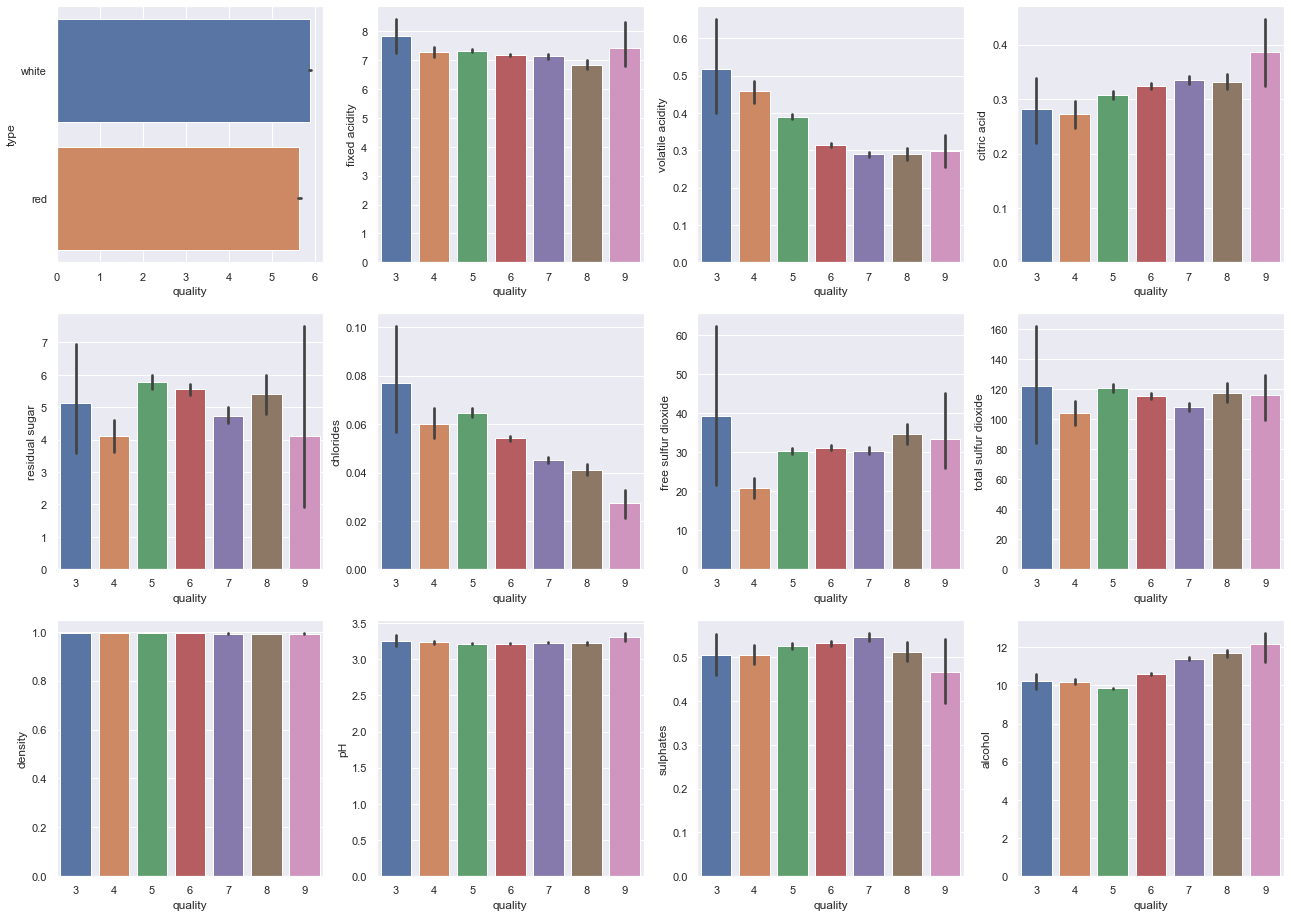

In [96]:
fig, ax1 = plt.subplots(3,4, figsize=(22,16))
k = 0
columns = list(df.columns)
for i in range(3):
    for j in range(4):
            sns.barplot(df['quality'], df[columns[k]], ax = ax1[i][j])
            k += 1
plt.show()

In [97]:
# category wine color
df['type'].replace({'white':0, 'red':1}, inplace=True)
df.rename(columns={'color':'is_red_wine'}, inplace=True)

In [98]:
##### Building a logistic model

In [99]:
df['quality'] = np.where(df['quality'] >=7, 1, 0)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [100]:
df['quality'].value_counts()

0    5192
1    1271
Name: quality, dtype: int64

In [101]:
# Fitting and evaluation various models
import statsmodels.api as sm

In [102]:
# Saving the independent variables to 'X'
X = df.drop("quality", axis=1)
# Saving dependent variable to 'y'
y = df["quality"]

##### Continue with the model

In [103]:
# !! Add constant to our X !!
X_const = sm.add_constant(X)
X_const.head()

,const,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,1.0,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,1.0,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,1.0,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,1.0,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


If we didn't add a constant then the sm.Logit would not calculate the constant and assume (B0 = 0), which would alter our coefficients as well.

Now, let's fit the model to the data:

In [104]:
# Istantiate and fit the logistic regression model 
logreg = sm.Logit(y, X_const).fit()
# Display the results 
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.390719
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                quality   No. Observations:                 6463
Model:                          Logit   Df Residuals:                     6450
Method:                           MLE   Df Model:                           12
Date:                Mon, 08 Feb 2021   Pseudo R-squ.:                  0.2118
Time:                        21:18:55   Log-Likelihood:                -2525.2
converged:                       True   LL-Null:                       -3203.9
Covariance Type:            nonrobust   LLR p-value:                2.094e-283
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  397.1142     65.742      6.040      0.000     268.262     525.966
type                     0.7822      0.245      3.193      0.001       0.302       1.262
fixed acidity            0.4903      0.067      7.295      0.000       0.359       0.622
volatile acidity        -3.7010      0.391     -9.472      0.000      -4.467      -2.935
citric acid             -0.2865      0.347     -0.825      0.409      -0.967       0.394
residual sugar           0.2198      0.026      8.359      0.000       0.168       0.271
chlorides               -7.6520      2.506     -3.053      0.002     -12.564      -2.740
free sulfur dioxide      0.0108      0.003      3.660      0.000       0.005       0.017
total sulfur dioxide    -0.0038      0.001     -2.801      0.005      -0.006      -0.001
density               -418.6916     66.769     -6.271      0.000    -549.556    -287.827
pH                       2.5569      0.362      7.064      0.000       1.847       3.266
sulphates                2.4645      0.286      8.628      0.000       1.905       3.024
alcohol                  0.4630      0.081      5.719      0.000       0.304       0.622
========================================================================================
"""

from the summary, we can tell the `citric acid` has p-value > 0.05, which means it does not have a significant coefficient so is not useful to predicting the quality of wine.

before we drop this column, let's take a look at the effects of multicollinearity

##### Initial check for multicollinearity
Using variance inflation factor

In [105]:
# import VIF function from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.Series(
    data = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index = X.columns
)

type                       6.781249
fixed acidity             71.067700
volatile acidity          11.269010
citric acid                9.397678
residual sugar             3.579433
chlorides                  5.842627
free sulfur dioxide        8.722090
total sulfur dioxide      20.531915
density                 1028.288806
pH                       659.921356
sulphates                 20.050843
alcohol                  111.375313
dtype: float64

In a perfect scenario of no multicollinearity, the VIF for each predictor should be 1 (hence, the $R^2$ from each model is 0). 

By common convention, any VIF value higher than 5 indicates high collinearity.

Let's look at an example. 

A high VIF means that the independent variable in question has a higher level of colinearity with the other independent variables.

An obvious step would be to just drop the columns with the highest VIF numbers. One thing to note however is that dropping one variable will change the VIFs for *all the independent variables*.

Lets check the VIFs after dropping `density`.

In [107]:
X_new = X.drop('density', axis=1)
pd.Series([variance_inflation_factor(X_new.values, i) 
               for i in range(X_new.shape[1])], 
              index=X_new.columns)

type                      6.169701
fixed acidity            45.891549
volatile acidity         11.210766
citric acid               9.395420
residual sugar            3.302253
chlorides                 5.532776
free sulfur dioxide       8.711865
total sulfur dioxide     20.380496
pH                      145.661527
sulphates                20.036604
alcohol                  99.167411
dtype: float64

The remaining columns have seen their VIFs drop substantially!

This result is pretty important. It means that we can reduce VIFs without having to drop a variable we think will be useful for predicting the dependent. Instead, drop a different variable which has high correlation with the variable we want to keep. Let's refit our model from above but without the `density` variable.

In [108]:
# Drop 'Parents/Children Aboard' and/or 'Fare' from. X_const
X_const = X_const.drop(["density"], axis=1)

,const,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,1.0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,3.00,0.45,8.8
1,1.0,0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,3.30,0.49,9.5
2,1.0,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,3.26,0.44,10.1
3,1.0,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9
4,1.0,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,1.0,1,6.8,0.620,0.08,1.9,0.068,28.0,38.0,3.42,0.82,9.5
6492,1.0,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,3.45,0.58,10.5
6494,1.0,1,6.3,0.510,0.13,2.3,0.076,29.0,40.0,3.42,0.75,11.0
6495,1.0,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,3.57,0.71,10.2


In [109]:
# Redo the process

# Istantiate and fit the logistic regression model 
logreg = sm.Logit(y, X_const).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.394034
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                quality   No. Observations:                 6463
Model:                          Logit   Df Residuals:                     6451
Method:                           MLE   Df Model:                           11
Date:                Mon, 08 Feb 2021   Pseudo R-squ.:                  0.2052
Time:                        21:27:30   Log-Likelihood:                -2546.6
converged:                       True   LL-Null:                       -3203.9
Covariance Type:            nonrobust   LLR p-value:                3.221e-275
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -14.9422      1.150    -12.990      0.000     -17.197     -12.688
type                    -0.0740      0.203     -0.364      0.716      -0.473       0.325
fixed acidity            0.1587      0.041      3.831      0.000       0.078       0.240
volatile acidity        -4.0101      0.388    -10.337      0.000      -4.770      -3.250
citric acid             -0.4504      0.345     -1.304      0.192      -1.127       0.227
residual sugar           0.0638      0.009      6.789      0.000       0.045       0.082
chlorides              -11.4498      2.676     -4.279      0.000     -16.694      -6.205
free sulfur dioxide      0.0133      0.003      4.582      0.000       0.008       0.019
total sulfur dioxide    -0.0053      0.001     -3.996      0.000      -0.008      -0.003
pH                       1.0414      0.269      3.865      0.000       0.513       1.569
sulphates                1.8787      0.273      6.894      0.000       1.345       2.413
alcohol                  0.9106      0.038     23.719      0.000       0.835       0.986
========================================================================================
"""

After dropped the `density` and refitted the model, we got diff. result showing that `type` has p-value > 0.05, which means it does not have a significant coefficient so is not useful to predicting the quality of wine.

##### Check accuracy

In [110]:
# Define a function to check logistic model accuracy
def get_acc(logreg, X_const, y):
    y_proba = logreg.predict(X_const)
    y_pred = np.where(y_proba >= 0.5, 1, 0)
    acc = (y_pred == y).mean()
    print(f"Accuracy: {acc}")

In [111]:
# Get model accuracy
get_acc(logreg, X_const, y)

Accuracy: 0.8164938882871732


##### Next Steps:

The next stage would be to iteratively improve our model. We can do this by removing independent variables and see how that affects the model results (`model.summary()`) and performance (accuracy). 

We could start with the independent variables which had a p-value > 0.05 for their regression coefficient. As a next step, try removing these and then evaluating the model. 

**NOTE:**
There is no 100% 'correct' model building process. It's a combination of looking at correlations, model coefficients and their p-values, and sometimes domain knowledge. We recommend outlining a well-defined process and then **following it in a consistent manner**. Dropping the independent variables should not be done at random (e.g., "I don't think x has anything to do with y so I'll drop x.") 

In [112]:
# Drop 'type' from. X_const
X_const = X_const.drop(["type"], axis=1)
X_const

,const,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,1.0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,3.00,0.45,8.8
1,1.0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,3.30,0.49,9.5
2,1.0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,3.26,0.44,10.1
3,1.0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9
4,1.0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
6491,1.0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,3.42,0.82,9.5
6492,1.0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,3.45,0.58,10.5
6494,1.0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,3.42,0.75,11.0
6495,1.0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,3.57,0.71,10.2


In [113]:
# Redo the process

# Istantiate and fit the logistic regression model 
logreg = sm.Logit(y, X_const).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.394045
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                quality   No. Observations:                 6463
Model:                          Logit   Df Residuals:                     6452
Method:                           MLE   Df Model:                           10
Date:                Mon, 08 Feb 2021   Pseudo R-squ.:                  0.2051
Time:                        21:30:39   Log-Likelihood:                -2546.7
converged:                       True   LL-Null:                       -3203.9
Covariance Type:            nonrobust   LLR p-value:                2.924e-276
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -14.8099      1.092    -13.568      0.000     -16.949     -12.671
fixed acidity            0.1538      0.039      3.927      0.000       0.077       0.231
volatile acidity        -4.0607      0.363    -11.202      0.000      -4.771      -3.350
citric acid             -0.4462      0.345     -1.293      0.196      -1.123       0.230
residual sugar           0.0639      0.009      6.798      0.000       0.045       0.082
chlorides              -11.8670      2.437     -4.870      0.000     -16.643      -7.091
free sulfur dioxide      0.0132      0.003      4.587      0.000       0.008       0.019
total sulfur dioxide    -0.0050      0.001     -4.410      0.000      -0.007      -0.003
pH                       1.0131      0.258      3.925      0.000       0.507       1.519
sulphates                1.8524      0.263      7.049      0.000       1.337       2.368
alcohol                  0.9112      0.038     23.746      0.000       0.836       0.986
========================================================================================
"""

In [114]:
# Get model accuracy
get_acc(logreg, X_const, y)

Accuracy: 0.817422249729228


The Accuracy imporved after we dropped the `type` which had a high p-value.

and now let's also drop the `citric acid`, reason being it's the only features left that had a p-value > 0.05, which means it does not have a significant coefficient so is not useful to predicting the quality of wine.

In [117]:
# Drop 'citric acid' from. X_const
X_const = X_const.drop(["citric acid"], axis=1)
X_const

,const,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,1.0,7.0,0.270,20.7,0.045,45.0,170.0,3.00,0.45,8.8
1,1.0,6.3,0.300,1.6,0.049,14.0,132.0,3.30,0.49,9.5
2,1.0,8.1,0.280,6.9,0.050,30.0,97.0,3.26,0.44,10.1
3,1.0,7.2,0.230,8.5,0.058,47.0,186.0,3.19,0.40,9.9
4,1.0,7.2,0.230,8.5,0.058,47.0,186.0,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...
6491,1.0,6.8,0.620,1.9,0.068,28.0,38.0,3.42,0.82,9.5
6492,1.0,6.2,0.600,2.0,0.090,32.0,44.0,3.45,0.58,10.5
6494,1.0,6.3,0.510,2.3,0.076,29.0,40.0,3.42,0.75,11.0
6495,1.0,5.9,0.645,2.0,0.075,32.0,44.0,3.57,0.71,10.2


In [118]:
# Redo the process

# Istantiate and fit the logistic regression model 
logreg = sm.Logit(y, X_const).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.394175
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                quality   No. Observations:                 6463
Model:                          Logit   Df Residuals:                     6453
Method:                           MLE   Df Model:                            9
Date:                Mon, 08 Feb 2021   Pseudo R-squ.:                  0.2049
Time:                        21:34:04   Log-Likelihood:                -2547.6
converged:                       True   LL-Null:                       -3203.9
Covariance Type:            nonrobust   LLR p-value:                5.436e-277
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -14.7122      1.087    -13.534      0.000     -16.843     -12.582
fixed acidity            0.1319      0.035      3.741      0.000       0.063       0.201
volatile acidity        -3.8910      0.338    -11.529      0.000      -4.553      -3.230
residual sugar           0.0626      0.009      6.695      0.000       0.044       0.081
chlorides              -12.0899      2.425     -4.985      0.000     -16.844      -7.336
free sulfur dioxide      0.0134      0.003      4.662      0.000       0.008       0.019
total sulfur dioxide    -0.0052      0.001     -4.626      0.000      -0.007      -0.003
pH                       1.0159      0.258      3.940      0.000       0.511       1.521
sulphates                1.8304      0.262      6.979      0.000       1.316       2.344
alcohol                  0.9018      0.038     24.002      0.000       0.828       0.975
========================================================================================
"""

In [119]:
# Get model accuracy
get_acc(logreg, X_const, y)

Accuracy: 0.816339161380164


at this stage all of the features have a significant coefficient so is very useful to predicting the quality of wine.

### Interpreting coefficents:

Let's interpret some of the coefficients and determine how the different factors impact the odds of a wine's quality.

In [120]:
# Lets put this in a dataframe
result_df = pd.DataFrame(logreg.params, columns=["Coeff"])
result_df

,Coeff
const,-14.712183
fixed acidity,0.131887
volatile acidity,-3.891044
residual sugar,0.062567
chlorides,-12.089937
free sulfur dioxide,0.013360
total sulfur dioxide,-0.005217
pH,1.015914
sulphates,1.830380
alcohol,0.901818


In [122]:
# Calculate and add the odds ratios to results_df
result_df["odd_ratio"] = round(np.exp(result_df["Coeff"]),4)
result_df

,Coeff,odd_ratio
const,-14.712183,0.0000
fixed acidity,0.131887,1.1410
volatile acidity,-3.891044,0.0204
residual sugar,0.062567,1.0646
chlorides,-12.089937,0.0000
free sulfur dioxide,0.013360,1.0135
total sulfur dioxide,-0.005217,0.9948
pH,1.015914,2.7619
sulphates,1.830380,6.2363
alcohol,0.901818,2.4641


It looks like the the factor that had the greatest (positive) impact on a wine quality rating was the amount of `sulphates`.
with high concentrage of `sulphates` meant that it had 6.23 times better odds to rate as good quality wine.